## ***IMPORTING THE DEPENDECIES***

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

## ***Data Preprocessing***

#### **Basic Preprocessing**

In [24]:
df = pd.read_csv(r"C:\Users\Subham Pathak\Desktop\ML_PROJECTS\student-placement\data\student_placement.csv")
df.head()

lb = LabelEncoder()
sc = StandardScaler()

# Remocing unwanted columns
df = df.drop(columns=['College_ID'])


# Label encoding
df['Internship_Experience'] = lb.fit_transform(df['Internship_Experience'])
df['Placement'] = lb.fit_transform(df['Placement'])

# scalling
num_cols = [
    'IQ',
    'Prev_Sem_Result',
    'CGPA',
    'Academic_Performance',
    'Extra_Curricular_Score',
    'Communication_Skills',
    'Projects_Completed'
]

df[num_cols] = sc.fit_transform(df[num_cols])

In [25]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000
mean,-1.197265e-16,5.691447e-16,1.890044e-16,-6.536993e-17,0.396400,-9.237056e-17,3.943512e-17,1.016076e-16,0.165900
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.489174,1.000050e+00,1.000050e+00,1.000050e+00,0.372009
min,-3.884563e+00,-1.751825e+00,-2.035539e+00,-1.582274e+00,0.000000,-1.573097e+00,-1.572644e+00,-1.464794e+00,0.000000
25%,-6.956921e-01,-8.606004e-01,-8.451170e-01,-8.862180e-01,0.000000,-9.401746e-01,-8.831598e-01,-8.820000e-01,0.000000
50%,-3.134395e-02,1.680684e-02,1.198652e-02,1.578654e-01,0.000000,9.209021e-03,1.510659e-01,2.835874e-01,0.000000
75%,6.994390e-01,8.665792e-01,8.418804e-01,8.539210e-01,1.000000,9.585926e-01,8.405497e-01,8.663811e-01,0.000000
max,3.888310e+00,1.702534e+00,1.991488e+00,1.549977e+00,1.000000,1.591515e+00,1.530034e+00,1.449175e+00,1.000000


In [26]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,0.500135,-0.639521,-0.851919,0.853921,0,0.958593,0.840550,0.866381,0
1,-0.164214,-1.392572,-1.470939,0.853921,0,0.642131,0.840550,-1.464794,0
2,0.633004,-1.503111,-1.158028,1.201949,0,-0.623713,-1.572644,-0.882000,0
3,1.496657,-1.427115,-1.212447,0.157865,1,-1.256636,0.151066,-0.882000,0
4,-0.230648,0.258612,0.107220,0.505893,0,0.958593,1.530034,-0.299206,0


#### **Detecting Outliers**

In [27]:
# Conclusion

#  CGPa = 7.6+ , IQ = 80+

In [28]:
print(df.head(5))
print(df.shape)

         IQ  Prev_Sem_Result      CGPA  Academic_Performance  Internship_Experience  Extra_Curricular_Score  Communication_Skills  Projects_Completed  Placement
0  0.500135        -0.639521 -0.851919              0.853921                      0                0.958593              0.840550            0.866381          0
1 -0.164214        -1.392572 -1.470939              0.853921                      0                0.642131              0.840550           -1.464794          0
2  0.633004        -1.503111 -1.158028              1.201949                      0               -0.623713             -1.572644           -0.882000          0
3  1.496657        -1.427115 -1.212447              0.157865                      1               -1.256636              0.151066           -0.882000          0
4 -0.230648         0.258612  0.107220              0.505893                      0                0.958593              1.530034           -0.299206          0
(10000, 9)


<Axes: xlabel='IQ', ylabel='Prev_Sem_Result'>

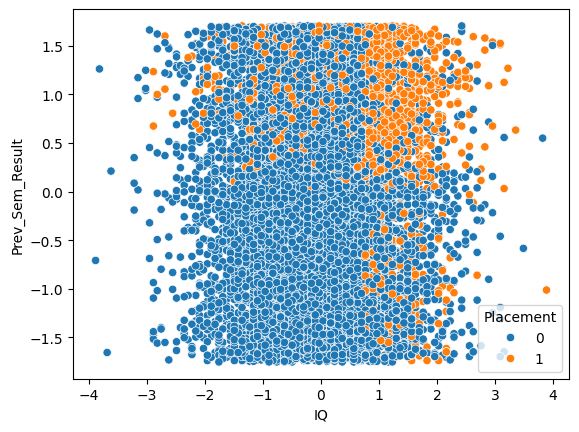

In [29]:
# Scatter-plot

sns.scatterplot(df, x= df['IQ'], y=df['Prev_Sem_Result'], hue=df['Placement']) 

##### **Key Takeaways**
- Learning techniques to detect outliers: boxplots, Z-score method, interquartile range (IQR) method.
- Strategies to handle outliers: trimming/removing, quantile-based flooring and capping, mean/median imputation.
- Visualizing and evaluating the data after treating outliers for improved analysis and decision-making.

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

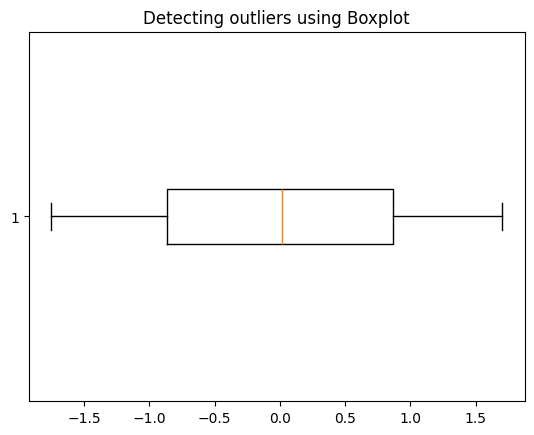

In [30]:
# Using boxplot

plt.boxplot(df['Prev_Sem_Result'], vert=False)
plt.title("Detecting outliers using Boxplot")

In [31]:
# Using z-score
# z = x-mean/std

outliers = []

def detect_outliers_z_score(data):
    thres = 2
    std = np.std(data)
    mean = np.mean(data)
    
    z_score = (data-mean)/std
    outliers = data[np.abs(z_score) > thres]

    return outliers


x = df['CGPA'].to_numpy()
detect_outliers_z_score(x)

array([-2.0015265 , -2.00832891, -2.0015265 , -2.0015265 , -2.01513132,
       -2.02193373, -2.03553854])

#### **Removing outliers**

In [32]:
df.head()

df['IQ'] = np.where(
    df['IQ']<80,
    df['IQ'].mean(),
    df['IQ']
)

In [33]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,-1.197265e-16,-0.639521,-0.851919,0.853921,0,0.958593,0.840550,0.866381,0
1,-1.197265e-16,-1.392572,-1.470939,0.853921,0,0.642131,0.840550,-1.464794,0
2,-1.197265e-16,-1.503111,-1.158028,1.201949,0,-0.623713,-1.572644,-0.882000,0
3,-1.197265e-16,-1.427115,-1.212447,0.157865,1,-1.256636,0.151066,-0.882000,0
4,-1.197265e-16,0.258612,0.107220,0.505893,0,0.958593,1.530034,-0.299206,0


In [34]:
df['Placement'].value_counts()       # This is the case of imbalance dataset

Placement
0    8341
1    1659
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [36]:
x = df.drop(columns='Placement')
y = df['Placement']

In [ ]:
# def train_test_split(self, x, y, test_size = None):
        
#         if test_size is not None:
#             test_size = np.random.seed(test_size)
        
#         x = np.asarray(x)
#         y = np.asarray(y)
        
#         # 0.2
        
#         n_samples = len(x)
#         test_count = (test_size*n_samples)
        
#         indices = np.random.permutation(n_samples)
        
        
#         test_indices = indices[:test_count]
#         train_indices = indices[test_count:]
        
#         x_train = x[train_indices]
#         x_test = x[test_indices]
        
#         y_train = y[train_indices]
#         y_test = y[test_indices]
        
        
#         return x_train, x_test, y_train, y_test
    

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify = y)

In [39]:
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

#### **Building an Machine Learning Model from Scratch**

In [40]:
# import numpy as np

# class LogisticRegressionScratch:

#     def __init__(self, epochs=1000, learning_rate=0.01):
#         self.epochs = epochs
#         self.learning_rate = learning_rate

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     def fit(self, X, y):

#         self.m, self.n = X.shape

       
#         self.w = np.zeros(self.n)
#         self.b = 0

#         self.X = X
#         self.y = y

#         for _ in range(self.epochs):
#             self.update_weights()

#     def update_weights(self):

        
#         z = np.dot(self.X, self.w) + self.b

      
#         y_pred = self.sigmoid(z)

       
#         dw = (1/self.m) * np.dot(self.X.T, (y_pred - self.y))
#         db = (1/self.m) * np.sum(y_pred - self.y)

        
#         self.w -= self.learning_rate * dw
#         self.b -= self.learning_rate * db

#     def predict(self, X):

#         z = np.dot(X, self.w) + self.b
#         y_hat = self.sigmoid(z)

#         return (y_hat > 0.5).astype(int)


In [41]:
model = LogisticRegression()
model.fit(x_train_sm, y_train_sm)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
accuracy = model.predict(x_test)

In [49]:
acc = accuracy_score(y_test, accuracy)
acc*100

78.88

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, accuracy)
cm

array([[1640,  445],
       [  83,  332]])